In [ ]:
!pip install yfinance 


     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 12.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


[*********************100%***********************]  1 of 1 completed


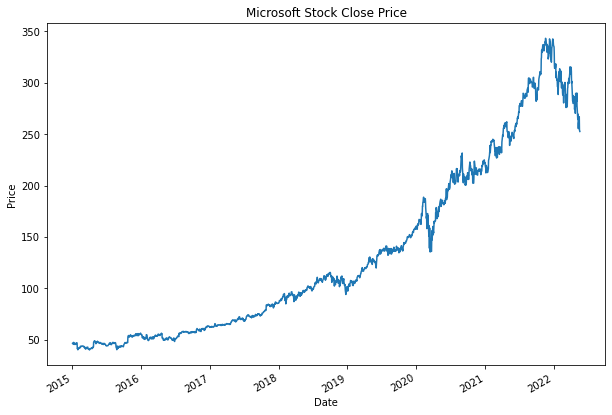

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

data = yf.download('MSFT', '2015-01-01')
data['Close'].plot(figsize=(10,7))
plt.title('Microsoft Stock Close Price')
plt.ylabel('Price')
plt.show()

Calcuting **The Moving Averages** 

When the short-term moving average (50-day moving average) crosses above the long-term moving average (200-day crossover), we buy the security. This is also called a **golden crossover.**

When the short-term moving average crosses below the long-term average, we sell. This is called the **death cross.**

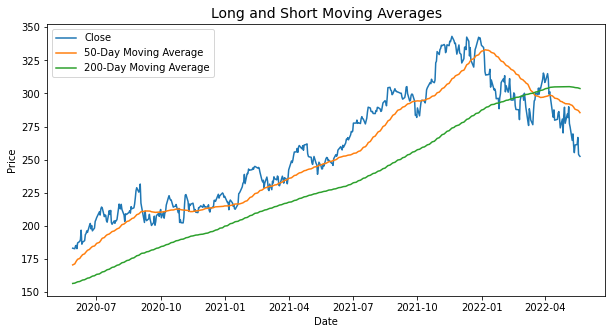

In [ ]:
# Define long and short window 
short_window = 50
long_window = 200

# Calculate moving averages
data['short_mavg'] = data['Close'].rolling(short_window).mean()
data['long_mavg'] = data['Close'].rolling(long_window).mean()

# Plot close price and moving averages
plot_data = data[-500:]
plt.figure(figsize=(10, 5))
plt.title('Long and Short Moving Averages', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(plot_data['Close'], label='Close')
plt.plot(plot_data['short_mavg'], label='50-Day Moving Average')
plt.plot(plot_data['long_mavg'], label='200-Day Moving Average')

plt.legend()

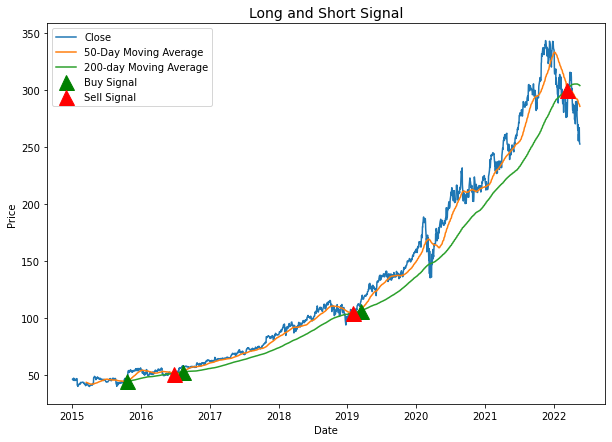

In [ ]:
# Take long positions
data['long_positions'] = np.where(data['short_mavg'] > data['long_mavg'], 1, 0)

# Take short positions
data['short_positions'] = np.where(data['short_mavg'] < data['long_mavg'], -1, 0)

data['positions'] = data['long_positions'] + data['short_positions'] 

# Plot close price and moving averages
plot_data = data[-3000:]
plt.figure(figsize=(10, 7))
plt.title('Long and Short Signal', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(plot_data['Close'], label='Close')
plt.plot(plot_data['short_mavg'], label='50-Day Moving Average')
plt.plot(plot_data['long_mavg'], label='200-day Moving Average')


plt.plot(plot_data[(plot_data['long_positions'] == 1) &
                       (plot_data['long_positions'].shift(1) == 0)]['short_mavg'],
         '^', ms=15, label='Buy Signal', color='green')


plt.plot(plot_data[(plot_data['short_positions'] == -1) &
                       (plot_data['short_positions'].shift(1) == 0)]['short_mavg'],
         '^', ms=15, label='Sell Signal', color='red')

plt.legend()
plt.show()


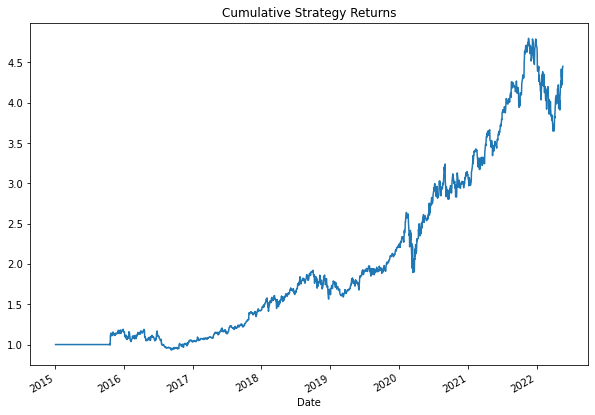

In [ ]:
# Calculate daily returns
data['returns'] = data['Close'].pct_change()

# Calculate strategy returns
data['strategy_returns'] = data['returns'] * data['positions'].shift(1)

# Plot cumulative returns
cumulative_returns = (data['strategy_returns'] + 1).cumprod()
cumulative_returns.plot(figsize=(10, 7))
plt.title('Cumulative Strategy Returns')
plt.show()

In [ ]:
# Total number of trading days
days = len(cumulative_returns)

# Calculate compounded annual growth rate
# We will use 252 instead oof 365, as number of trading days in a year is 252
annualised_returns = (cumulative_returns.iloc[-1]**(252/days)-1)*100



# Calculate annualised volatility
annualised_volatility = np.std(data.strategy_returns)*(252**0.5)*100



# Assume an average annual risk-free rate is 1%
risk_free_rate = 0.01/252

sharpe_ratio = np.sqrt(252)*(np.mean(data.strategy_returns) -
                       (risk_free_rate))/np.std(data.strategy_returns)


# Calculate the running maximum
running_max = np.maximum.accumulate(cumulative_returns.dropna())

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cumulative_returns)/running_max - 1
max_dd = drawdown.min()*100

print('The annualised retunrs of strategy is %.2f' % annualised_returns + '%')

The annualised retunrs of strategy is 22.42%
